## Disembiguate speckle transformations

Check if the Fourier transforms of a speckle and its conjugate is different


### Imports + Grid and fiber generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber
from mmfsim.speckle import DegenGrinSpeckle
from mmfsim.transforms import fourier_transform, fresnel_transform

grid = Grid(pixel_size=0.5e-6, pixel_numbers=(256,256))
fiber = GrinFiber()

### Speckle generation

Create a first speckle with random complex modes coefficients. Create the second speckle from the conjugate of the modes coefficients.

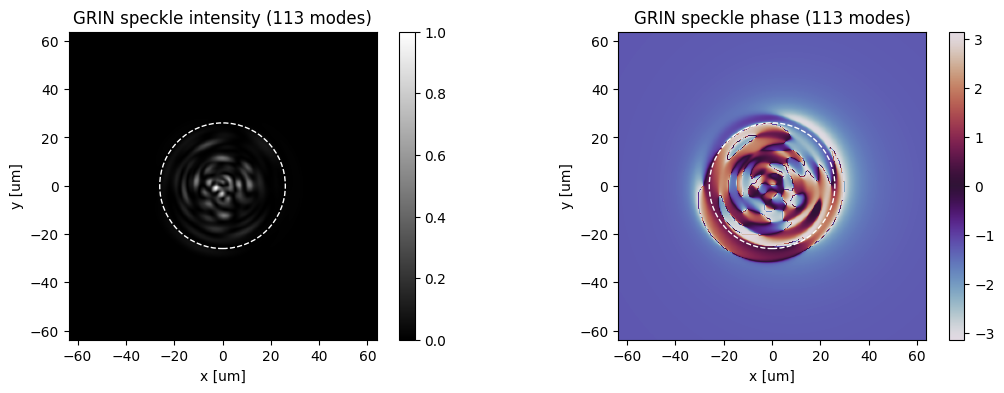

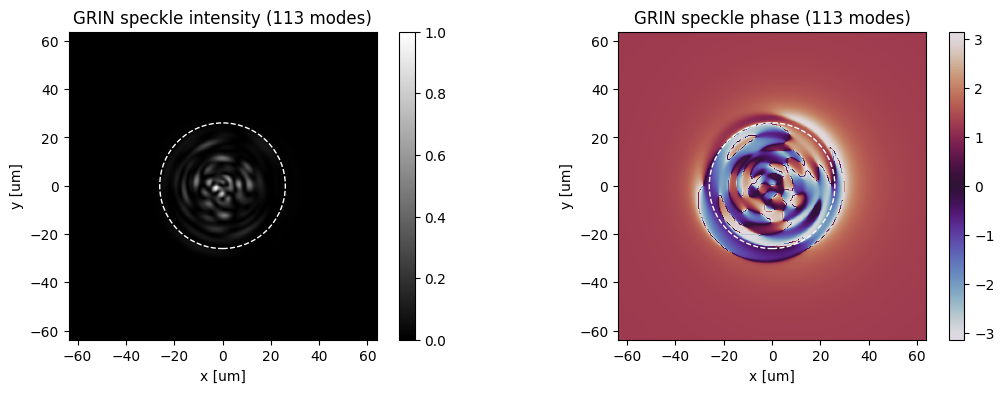

In [4]:
speckle1 = DegenGrinSpeckle(fiber, grid, N_modes=fiber._N_modes_degen)
speckle1.compose()

speckle2 = DegenGrinSpeckle(fiber, grid, N_modes=fiber._N_modes_degen)
speckle2.compose(coeffs=np.conj(speckle1.modes_coeffs))

_ = speckle1.plot(complex=True)
_ = speckle2.plot(complex=True)

### Propagate both speckles and compare their Fresnel and Fourier intensities

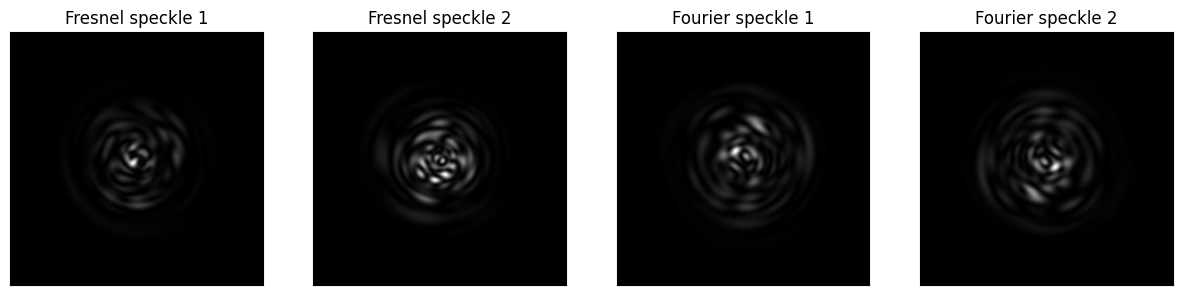

In [10]:
fres1 = fresnel_transform(speckle1.field, grid, delta_z=100e-6, pad=2)
fres2 = fresnel_transform(speckle2.field, grid, delta_z=100e-6, pad=2)
four1 = fourier_transform(speckle1.field, pad=2)
four2 = fourier_transform(speckle2.field, pad=2)


pls = []
titles = ['Fresnel speckle 1', 'Fresnel speckle 2', 'Fourier speckle 1', 'Fourier speckle 2']
fig, axs = plt.subplots(1, 4, figsize=(15,5))
pls.append(axs[0].imshow(np.square(np.abs(fres1)), cmap='gray'))
pls.append(axs[1].imshow(np.square(np.abs(fres2)), cmap='gray'))
pls.append(axs[2].imshow(np.square(np.abs(four1)), cmap='gray'))
pls.append(axs[3].imshow(np.square(np.abs(four2)), cmap='gray'))

_ = [axs[i].set_xticks([]) for i in range(len(axs))]
_ = [axs[i].set_yticks([]) for i in range(len(axs))]
_ = [axs[i].set_title(titles[i]) for i in range(len(axs))]